In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

In [2]:
# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
# plot function
def numerical_plotting(data, col, title, symb, ylabel, color):
    fig, ax = plt.subplots(2, 1, 
                           sharex=True, 
                           figsize=(20, 8),
                           facecolor="#FFFFFF",
                           gridspec_kw={"height_ratios": (.2, .8)})
    
    ax[0].set_facecolor("#FFFFFF")
    ax[1].set_facecolor("#FFFFFF")
    
    ax[0].set_title(title, 
                    weight="bold", 
                    fontsize=30, 
                    pad=30)
    
    sns.boxplot(x=col, 
                data=data,
                color=color,
                ax=ax[0])
    
    ax[0].set(yticks=[])
    
    sns.distplot(data[col], kde=True, color=color)
    
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    
    ax[0].set_xlabel(col, weight="bold", fontsize=15, labelpad=15)
    ax[1].set_xlabel(col, weight="bold", fontsize=15)
    ax[1].set_ylabel(ylabel, weight="bold", fontsize=15)
    
    plt.axvline(data[col].mean(), 
                color='darkgreen', 
                linewidth=2.2, 
                label='mean=' + str(np.round(data[col].mean(),1)) + symb)
    plt.axvline(data[col].median(), 
                color='red', 
                linewidth=2.2, 
                label='median='+ str(np.round(data[col].median(),1)) + symb)
    plt.axvline(data[col].max(), 
                color='blue', 
                linewidth=2.2, 
                label='max='+ str(np.round(data[col].max(),1)) + symb)
    plt.axvline(data[col].min(), 
                color='orange', 
                linewidth=2.2, 
                label='min='+ str(np.round(data[col].min(),1)) + symb)
    plt.axvline(data[col].mode()[0], 
                color='purple', 
                linewidth=2.2, 
                label='mode='+ str(data[col].mode()[0]) + symb)
    
    
    plt.legend(bbox_to_anchor=(1, 1), 
               ncol=1, 
               fontsize=17, 
               fancybox=True, 
               shadow=True, 
               frameon=False)
    
    plt.tight_layout()
    plt.show()
    
def count_pie_plot(datapie, datacount, colpiey, colcount, text1, text2, piecomap,
                   xlabel, ylabel, xticklabel, yticklabel, ystart, yend, pielabels, yplus, 
                   piefs=10, countcomap=None, pctdistance=0.65, fontsize=15, xtickrotation=None):

    # Subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   nrows=1, 
                                   facecolor=("#FFFFFF"),
                                   figsize=(24, 8))

    datapie.plot(kind="pie", 
                 y=colpiey,
                 autopct='%1.1f%%',
                 labels=None,
                 startangle=90,
                 colors=piecomap,
                 wedgeprops=dict(width=0.15),
                 pctdistance=pctdistance,
                 fontsize=piefs,
                 ax=ax1,
                 textprops=dict(color="black", 
                                weight="bold"))
    
    sns.countplot(x=colcount,
                  data=datacount,
                  palette=countcomap,
                  ax=ax2)

    #title
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    
    ax1.text(x0, y1 * 1.40, 
             text1, 
             fontsize=30, 
             ha="left", 
             va="center", 
             weight="bold")
    ax1.text(x0, y1 * 1.25, 
             text2, 
             fontsize=18, 
             ha="left", 
             va="center")
    
    ax1.legend(pielabels, 
               loc="upper left", 
               bbox_to_anchor=(x0*0.01, y1*0.85), 
               prop={'size': 10.5}, frameon=False, ncol=len(datapie))
    
    ax2.set_xlabel(xlabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_ylabel(ylabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_xticklabels(labels=xticklabel,
                        weight="semibold",
                        fontsize=10,
                        rotation=xtickrotation)
    ax2.set_yticklabels(labels=yticklabel,
                        weight="semibold",
                        fontsize=10)

    # data label
    i=0

    for p in ax2.patches:
        value = f"{p.get_height()}"
        if (i < 2):
            y1 = -2
        else:
            y1 = 2
        i += 1
        x = p.get_x() + p.get_width() / 2 
        y = p.get_y() + p.get_height() + yplus
        ax2.text(x, y, value, ha="center", va="center", fontsize=15, weight="semibold") 

    ax2.set_ylim(ystart, yend)
    ax2.set_facecolor("#FFFFFF")
    ax1.set_ylabel(None)
    
    plt.tight_layout()
    return fig

def countplot_y(data, xplus, coly, sizey, text1, text2, 
                xlabel, ylabel, xstart, xend, ytimes1, ytimes2):

    fig, ax = plt.subplots(ncols=1,
                           nrows=1,
                           facecolor=("#FFFFFF"),
                           figsize=(24, sizey))

    sns.countplot(y=coly,
                  data=data,
                  palette=['#E0144C', '#FF5858', '#3AB0FF', '#FFB562', '#6FEDD6', '#6D9885'],
                  ax=ax)

    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    ax.text(x0, y1 * ytimes1, 
            text1, fontsize=30, 
            ha="left", va="center", weight="bold")
    ax.text(x0, y1 * ytimes2, 
            text2, fontsize=18, 
            ha="left", va="center")

    plt.xticks(weight="bold",
               fontsize=10)
    plt.yticks(weight="bold",
               fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=25, labelpad=20)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=25, labelpad=20)

    # data label
    i=0

    for p in ax.patches:
        value = f'{p.get_width()}'
        if i < 7:
            x1 = -1.2
        else:
            x1 = 1.2

        i+=1
        x = p.get_x() + p.get_width() + xplus
        y = p.get_y() + p.get_height() -.4
        ax.text(x, y, value, ha='center', va='center', fontsize=15, weight='semibold') 

    plt.tight_layout()
    ax.set_xlim(xstart, xend)
    ax.set_facecolor("#FFFFFF")
    
    return fig

def bivariate_numerical_plot(data, x, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(20, 6), 
                           facecolor="#FFFFFF")
    sns.kdeplot(data=data, 
                x=x, 
                hue=hue, 
                fill=True)
    
    ax.set_facecolor("#FFFFFF")
    
    plt.title(title, weight="bold", 
              fontsize=25, pad=30)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.tight_layout()
    plt.show()
    
def mtvboxplot(data, x, y, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(24, 8))
    sns.boxplot(x=x, y=y, hue=hue, 
                data=data, ax=ax)
    plt.title(title, weight="bold", 
              fontsize=25, pad=25)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.tight_layout()
    plt.show()

In [4]:
# stat function

def spearman_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Spearman's Correlation
    coef, p = stats.spearmanr(data1, data2)
    print(f"Spearmans correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def pearson_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Pearson's Correlation
    coef, p = stats.pearsonr(data1, data2)
    print(f"Pearson correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def skew_kurtosis(data, title):
    skw = stats.skew(data, bias=False)
    kurt = stats.kurtosis(data, bias=False)
    
    print("-" * 20, title, "-" * 20)
    print(f"Skewness: {skw}")
    if (skw < -1) and (skw > 1):
        print("Highly skewed")
    elif (-1 < skw < -0.5) or (1 < skw < 0.5):
        print("Moderately skewed")
    elif (-0.5 < skw < 0.5):
        print("Approximately symmetric")
    print("-" * 35)
    print(f"Kurtosis: {kurt}")
    if (kurt > 1):
        print("The distribution is too peaked")
    elif (kurt < -1):
        print("The distribution is too flat")
    else:
        print("The distribution is non-normal")
    print("-" * 35)
    
def chebychev(data, title, interpret):
    mu = round(data.mean(), 1)
    s = round(data.std(), 1)
    
    fc = round(mu - (2 * s), 1)
    sc = round(mu + (2 * s), 1)
    
    print("-" * 20, f"Interpretation of {title}", "-" * 20)
    print(f"first calc: {fc}")
    print(f"second calc: {sc}")
    print(interpret)
    print("-" * 40)

### 1.4 | Dataset Problems

##### An organization wants to predict who possible defaulters are for the consumer loans product. 
##### They have data about historic customer behavior based on what they have observed. Hence when 
##### they acquire new customers they want to predict who is riskier and who is not.


In [5]:
df = pd.read_csv('data/Training Data.csv')

In [6]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [7]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

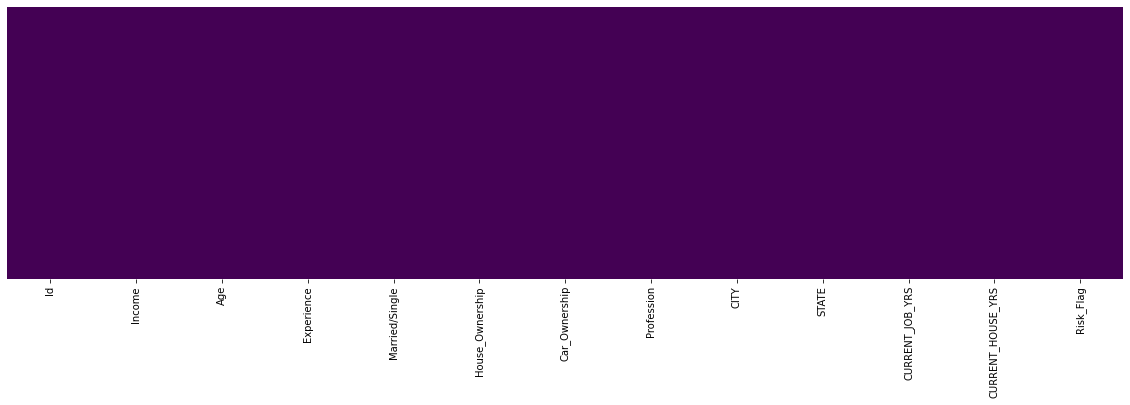

In [8]:
# plotting null values
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


### Uniqueness Categorical Variables
#### Let's have a look at categorical variables. How many unique values of these variables

In [10]:
categorical = df.select_dtypes(["category", "object"]).columns

In [11]:
categorical

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'], dtype='object')

In [12]:
for cat_col in categorical:
    print(f"{cat_col}: {df[cat_col].nunique()} uniqueness variable")

Married/Single: 2 uniqueness variable
House_Ownership: 3 uniqueness variable
Car_Ownership: 2 uniqueness variable
Profession: 51 uniqueness variable
CITY: 317 uniqueness variable
STATE: 29 uniqueness variable


### Discrete and Continuous Variables
##### Let's have a look at Discrete and Continuous variables.

In [13]:
numeric = df.select_dtypes(["int", "float"]).columns

In [14]:
for num_col in numeric:
    print(f"{num_col}: {df[num_col].nunique()} uniqueness variable")

Id: 252000 uniqueness variable
Income: 41920 uniqueness variable
Age: 59 uniqueness variable
Experience: 21 uniqueness variable
CURRENT_JOB_YRS: 15 uniqueness variable
CURRENT_HOUSE_YRS: 5 uniqueness variable
Risk_Flag: 2 uniqueness variable


#### How many missing data points do we have?¶
##### Let's see how many missing data we have in each column....

In [15]:
# Get the number of missing data points per column
missing_values_count = df.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]

Id                 0
Income             0
Age                0
Experience         0
Married/Single     0
House_Ownership    0
Car_Ownership      0
Profession         0
CITY               0
STATE              0
dtype: int64

##### Great! there's no missing value! let's see the unique variables on the categorical data!

In [16]:
df.Profession.unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [17]:
df.CITY.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [18]:
df.STATE.unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

##### Note:
###### We can see above that there are many City names and also State that have a parantheses 
###### bracket characters and numbers that are not clear what they mean, let's clean that up later.

###### This dataset column is very inconsistent and neat, this can cause confusion or typing errors
###### in the future, let's change it so we can more easily analyze and predict it later.

## Data Cleaning
### 4.1 Checking and cleaning

In [19]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership',
       'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [20]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'income', 'age', 'experience', 'married/single', 'house_ownership', 'car_ownership',
       'profession', 'city', 'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

In [21]:
df.rename(columns={"married/single": "married_single"}, inplace=True)
df.columns

Index(['id', 'income', 'age', 'experience', 'married_single', 'house_ownership', 'car_ownership',
       'profession', 'city', 'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

##### Great! now into the city and state variables, let's clean the characters!

In [22]:
df.city = df.city.str.extract("([A-Za-z]+)")
df.city.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar', 'Tiruchirappalli',
       'Jalgaon', 'Tiruppur', 'Jamnagar', 'Kota', 'Karimnagar', 'Hajipur',
       'Adoni', 'Erode', 'Kollam', 'Madurai', 'Anantapuram', 'Kamarhati',
       'Bhusawal', 'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad',
       'Ajmer', 'Ongole', 'Miryalaguda', 'Ambattur', 'Indore',
       'Pondicherry', 'Shimoga', 'Chennai', 'Gulbarga', 'Khammam',
       'Saharanpur', 'Gopalpur', 'Amravati', 'Udupi', 'Howrah',
       'Aurangabad', 'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar',
       'Bellary', 'Danapur', 'Purnia', 'Bijapur', 'Patiala', 'Malda',
       'Sagar', 'Durgapur', 'Junagadh', 'Singrauli', 'Agartala',
       'Thanjavur', 'Hindupur', 'Naihati', 'North', 'Panchkula',
       'Anantapur', 'Serampore', 'Bathinda', 'Nadiad', 'Kanpur',
       'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad', 'Bidar',
       'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol', 'Deoghar',
       'Eluru', 'Ulhasnagar', 'Aligarh'

##### Great! now state variable

In [23]:
df.state = df.state.str.extract("([A-Za-z]+)")
df.state.unique()

array(['Madhya', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil', 'Gujarat',
       'Rajasthan', 'Telangana', 'Bihar', 'Andhra', 'West', 'Haryana',
       'Puducherry', 'Karnataka', 'Uttar', 'Himachal', 'Punjab',
       'Tripura', 'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam', 'Jammu',
       'Delhi', 'Chhattisgarh', 'Chandigarh', 'Manipur', 'Sikkim'],
      dtype=object)

#### 4.2 Random Under-Sampling

In [24]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

In [25]:
# amount of fraud classes 492 rows.
risk_data = df.loc[df["risk_flag"] == 1]
not_risk_data = df.loc[df["risk_flag"] == 0][:30996]

normal_distributed_data = pd.concat([risk_data, not_risk_data])

In [26]:
# Shuffle dataframe rows
loan = normal_distributed_data.sample(frac=1, random_state=42)

loan.head()

,id,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
96859,96860,8514369,21,5,single,rented,yes,Scientist,Udaipur,Rajasthan,4,13,0
148175,148176,5682236,32,14,single,owned,yes,Computer_hardware_engineer,Jamshedpur,Jharkhand,6,11,0
91954,91955,7541730,23,2,single,rented,no,Psychologist,Amroha,Uttar,2,10,0
110318,110319,1923313,71,5,single,rented,no,Magistrate,Pallavaram,Tamil,3,10,1
50524,50525,1067890,41,14,single,rented,yes,Air_traffic_controller,Sambalpur,Odisha,3,12,1


#### 4.3 | Equally Distributing and Correlating

Distribution of the risk_flag in the subsample dataset
0   0.500
1   0.500
Name: risk_flag, dtype: float64


<AxesSubplot:xlabel='risk_flag', ylabel='count'>

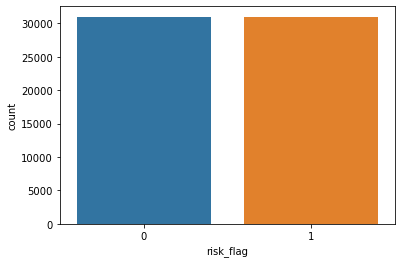

In [27]:
print("Distribution of the risk_flag in the subsample dataset")
print(loan["risk_flag"].value_counts() / len(loan))

# sns.countplot("risk_flag", data=loan)
# plt.title('Equally Distributed Risk Flag', fontsize=14);

sns.countplot(x=loan["risk_flag"])
plt.show()

##### Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

### 5. | Data Analysis

##### 5.1 | Descriptive Statistics

In [28]:
loan.describe(exclude=[np.number])

,married_single,house_ownership,car_ownership,profession,city,state
count,61992,61992,61992,61992,61992,61992
unique,2,3,2,51,316,28
top,single,rented,no,Physician,Aurangabad,Uttar
freq,56109,57481,44156,1484,365,7067


In [29]:
loan.describe(include=[np.number])

,id,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,61992.000,61992.000,61992.000,61992.000,61992.000,61992.000,61992.000
mean,128497.516,4994927.295,49.491,9.834,6.262,11.994,0.500
std,76403.417,2894902.000,17.213,6.030,3.695,1.400,0.500
min,4.000,10310.000,21.000,0.000,0.000,10.000,0.000
25%,61188.000,2467224.000,34.000,5.000,3.000,11.000,0.000
50%,128212.500,5011230.000,49.000,10.000,6.000,12.000,0.500
75%,199228.750,7515439.000,64.000,15.000,9.000,13.000,1.000
max,251998.000,9999180.000,79.000,20.000,14.000,14.000,1.000


In [30]:
# Grouping profession by its income in min, max, and mean
loan.groupby("profession")["income"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

profession,Drafter,Secretary,Surgeon,Economist,Computer_hardware_engineer,Official,Analyst,Police_officer,Biomedical_Engineer,Physician,Industrial_Engineer,Psychologist,Geologist,Comedian,Technology_specialist,Engineer,Hotel_Manager,Chemical_engineer,Technician,Surveyor,Magistrate,Civil_engineer,Web_designer,Statistician,Designer,Artist,Lawyer,Air_traffic_controller,Architect,Firefighter,Librarian,Financial_Analyst,Mechanical_engineer,Scientist,Petroleum_Engineer,Consultant,Army_officer,Microbiologist,Software_Developer,Dentist,Civil_servant,Computer_operator,Politician,Technical_writer,Flight_attendant,Chef,Aviator,Chartered_Accountant,Fashion_Designer,Design_Engineer,Graphic_Designer
min,64805.000,72334.000,18215.000,16890.000,87298.000,216875.000,91459.000,13557.000,35642.000,12608.000,21995.000,70387.000,43607.000,13429.000,75855.000,10310.000,17801.000,26926.000,16045.000,11114.000,67459.000,48245.000,57735.000,46244.000,92747.000,31297.000,28993.000,14339.000,25096.000,29380.000,59715.000,25268.000,47866.000,28561.000,79166.000,28519.000,12902.000,12825.000,66912.000,33496.000,11430.000,28070.000,98356.000,39724.000,11695.000,15016.000,118751.000,23621.000,12766.000,53886.000,10675.000
max,9999180.000,9998070.000,9995445.000,9994882.000,9994501.000,9993041.000,9992133.000,9987955.000,9987812.000,9987805.000,9986330.000,9985964.000,9985165.000,9984983.000,9984686.000,9983889.000,9983764.000,9983323.000,9982680.000,9982576.000,9982430.000,9981494.000,9980350.000,9978516.000,9978110.000,9976619.000,9976302.000,9975789.000,9974540.000,9974101.000,9973485.000,9972303.000,9971347.000,9970052.000,9968353.000,9967854.000,9967074.000,9962662.000,9962479.000,9959440.000,9951052.000,9946468.000,9945612.000,9945173.000,9939884.000,9935369.000,9935192.000,9926354.000,9915463.000,9913743.000,9819853.000
mean,4388039.441,5410561.087,5161785.970,4966588.267,5379043.683,4654545.648,4889755.741,4527811.799,5051650.566,4781208.314,4974475.431,5233712.308,4617094.331,5272986.680,5050271.543,4723818.298,4821917.877,5537594.219,5217543.025,5380282.069,4736842.708,5055796.629,5177218.275,4857258.464,5351692.547,5024300.930,5184585.445,4774304.318,5248315.363,4987530.313,4884218.092,4784566.938,5016295.172,5675856.549,5353838.276,4611822.456,5568913.207,4860950.234,4528253.580,4893915.172,4804005.047,5001085.719,4719719.445,5177470.382,4610724.914,5079118.572,5117323.039,5202130.405,5081711.387,4784681.889,4609955.451


In [31]:
# The average risk percentage of each city
loan.groupby(["city"]).risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

city,Gwalior,Bhubaneswar,Kochi,Imphal,Mysore,Kavali,Barasat,Sikar,Purnia,Satna,Ramagundam,Panipat,Bettiah,Raiganj,Bardhaman,Buxar,Udaipur,Gandhidham,Ahmedabad,Munger,Ghaziabad,Thiruvananthapuram,North,Srinagar,Kottayam,Moradabad,Raipur,Muzaffarnagar,Ratlam,Kamarhati,...,Kozhikode,Arrah,Karaikudi,Malegaon,Tirunelveli,South,Lucknow,Orai,Raichur,Katni,Noida,Belgaum,Bhagalpur,Ahmednagar,Tadipatri,Panihati,Hosur,Warangal,Gangtok,Mehsana,Mira,Bareilly,Rajpur,Berhampur,Latur,Sultan,Bangalore,Bijapur,Gandhinagar,Dehradun
risk_flag,74.667,72.000,71.893,70.115,69.658,68.773,68.667,68.459,68.208,68.035,68.000,67.935,67.778,67.717,67.713,67.656,66.477,66.260,66.169,66.165,65.993,65.827,64.977,64.671,64.211,64.021,64.019,63.470,63.469,63.426,...,31.724,31.606,31.395,31.250,31.138,30.814,30.303,30.286,30.216,28.767,28.058,27.966,27.607,27.536,27.083,26.974,26.667,26.596,25.926,25.000,25.000,24.581,24.194,23.009,23.000,21.687,21.429,17.544,16.832,16.667


In [32]:
# The average risk percentage of each state
loan.groupby("state").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

state,Manipur,Jammu,Kerala,Madhya,Tripura,Rajasthan,Assam,Odisha,Chhattisgarh,Jharkhand,Bihar,Telangana,Haryana,West,Himachal,Gujarat,Puducherry,Andhra,Uttar,Mizoram,Maharashtra,Delhi,Tamil,Karnataka,Chandigarh,Punjab,Uttarakhand,Sikkim
risk_flag,70.115,58.836,58.153,57.687,55.510,53.991,53.204,52.242,51.826,51.732,51.179,51.176,51.095,50.957,50.226,49.630,49.118,48.770,48.677,48.454,47.327,45.664,44.848,44.366,42.069,41.463,34.545,25.926


In [33]:
# The average risk percentage of each profession
loan.groupby("profession").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

profession,Police_officer,Army_officer,Surveyor,Geologist,Chartered_Accountant,Scientist,Firefighter,Technical_writer,Software_Developer,Official,Computer_hardware_engineer,Air_traffic_controller,Flight_attendant,Secretary,Civil_engineer,Architect,Technician,Lawyer,Comedian,Hotel_Manager,Microbiologist,Aviator,Psychologist,Computer_operator,Chef,Consultant,Analyst,Engineer,Artist,Politician,Biomedical_Engineer,Surgeon,Statistician,Civil_servant,Magistrate,Dentist,Physician,Fashion_Designer,Graphic_Designer,Drafter,Mechanical_engineer,Chemical_engineer,Librarian,Designer,Web_designer,Financial_Analyst,Design_Engineer,Economist,Industrial_Engineer,Petroleum_Engineer,Technology_specialist
risk_flag,58.375,56.902,56.622,56.073,55.961,54.762,54.741,53.615,53.495,53.417,52.874,52.574,51.713,51.643,51.520,51.518,51.316,51.274,50.890,50.797,50.753,50.591,50.500,50.081,50.000,49.876,49.868,49.792,49.625,49.072,49.025,48.891,48.836,48.574,48.346,48.339,47.844,47.775,47.642,47.638,47.549,47.390,46.853,46.698,46.124,45.169,44.858,44.163,43.311,40.357,37.295


In [34]:
# The average risk percentage whether the customer married or single
loan.groupby("married_single").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

married_single,single,married
risk_flag,50.544,44.807


In [35]:
# The average risk percentage whether the customer owned car or not
loan.groupby("car_ownership").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

car_ownership,no,yes
risk_flag,51.094,47.292


### 5.1.1 | Conclusion

##### Top 5 professions by its mean income

In [36]:
loan.groupby("profession")["income"].agg(["min", "max", "mean"]).sort_values(by="mean", ascending=False).head()

,min,max,mean
profession,,,
Scientist,28561,9970052,5675856.549
Army_officer,12902,9967074,5568913.207
Chemical_engineer,26926,9983323,5537594.219
Secretary,72334,9998070,5410561.087
Surveyor,11114,9982576,5380282.069


##### Top 5 risk flag average Percentage of City:

In [37]:
loan.groupby(["city"]).risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().head()

,risk_flag
city,
Gwalior,74.667
Bhubaneswar,72.000
Kochi,71.893
Imphal,70.115
Mysore,69.658


##### Top 5 risk flag average Percentage of State:

In [38]:
loan.groupby("state").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().head()

,risk_flag
state,
Manipur,70.115
Jammu,58.836
Kerala,58.153
Madhya,57.687
Tripura,55.510


##### Top 5 risk flag average Percentage of Profession:

In [39]:
loan.groupby("profession").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().head()

,risk_flag
profession,
Police_officer,58.375
Army_officer,56.902
Surveyor,56.622
Geologist,56.073
Chartered_Accountant,55.961


##### The average risk percentage whether the customer Married or Single:

In [40]:
loan.groupby("married_single").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame()

,risk_flag
married_single,
single,50.544
married,44.807


##### The average risk percentage whether the customer owned car or not:

In [41]:
loan.groupby("car_ownership").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame()

,risk_flag
car_ownership,
no,51.094
yes,47.292


### 5.2 | Univariate Analysis

##### Chebychev's Theorem

##### Chebyshev's Theorem estimates the minimum proportion of observations 
##### that fall within a specified number of standard deviations from the mean. 
##### This theorem applies to a broad range of probability distributions.
##### Chebyshev's Theorem is also known as Chebyshev's Inequality


#### About skewness:

##### As a general rule of thumb: If skewness is less than  −1  or greater than  1 , the distribution is highly skewed. 
##### If skewness is between  −1  and  −0.5  or between  0.5  and  1 , the distribution is moderately skewed.
##### If skewness is between  −0.5  and  0.5 , the distribution is approximately symmetric.

#### About kurtosis:

##### For kurtosis, the general guideline is that if the number is greater than  +1 , the distribution is too peaked.
##### Likewise, a kurtosis of less than  −1  indicates a distribution that is too flat.
##### Distributions exhibiting skewness and/or kurtosis that exceed these guidelines are considered non-normal.

#### 5.2.1 | Numerical Column

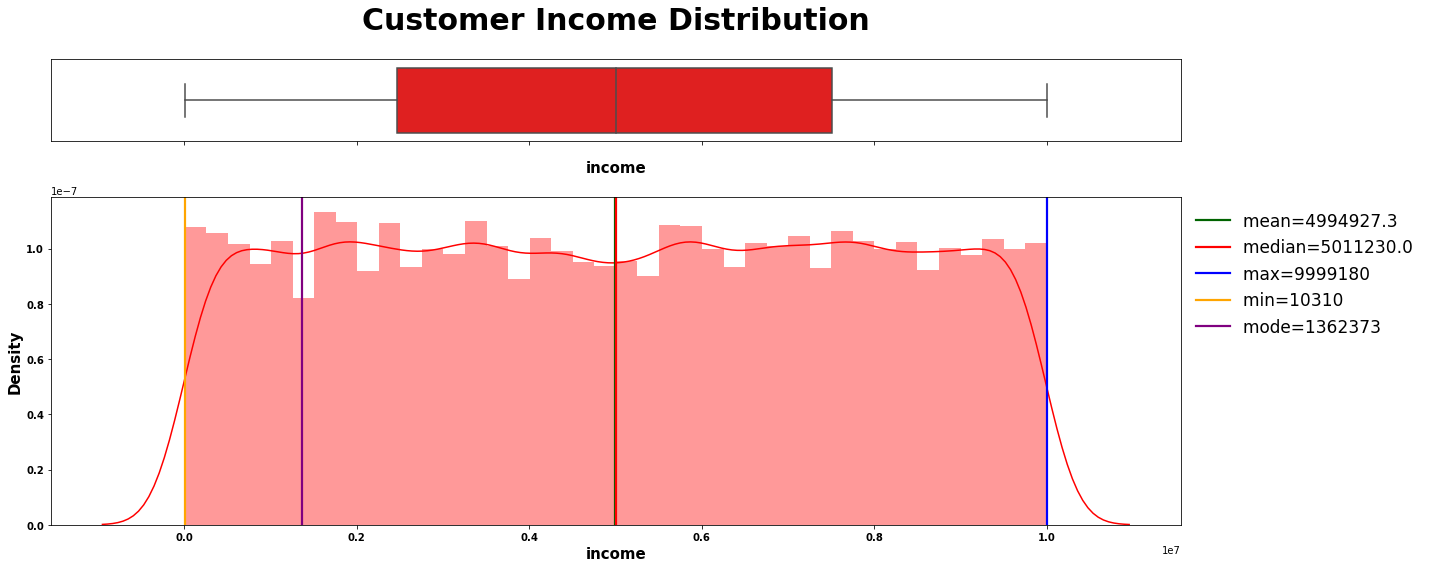

In [42]:
numerical_plotting(data=loan, col="income", 
                   title="Customer Income Distribution", 
                   symb=" ", ylabel="Density", color="red");

##### 5.2.1.1 | Notes:

In [43]:
chebychev(loan.income, title="Income", 
          interpret=f"at least 75% customer income is lies between 0 and 10.785.254 Rupee")

-------------------- Interpretation of Income --------------------
first calc: -794876.7
second calc: 10784731.3
at least 75% customer income is lies between 0 and 10.785.254 Rupee
----------------------------------------


In [44]:
skew_kurtosis(loan.income, "Skew & Kurtosis Income")

-------------------- Skew & Kurtosis Income --------------------
Skewness: -0.0022836565749410082
Approximately symmetric
-----------------------------------
Kurtosis: -1.2089723634806384
The distribution is too flat
-----------------------------------


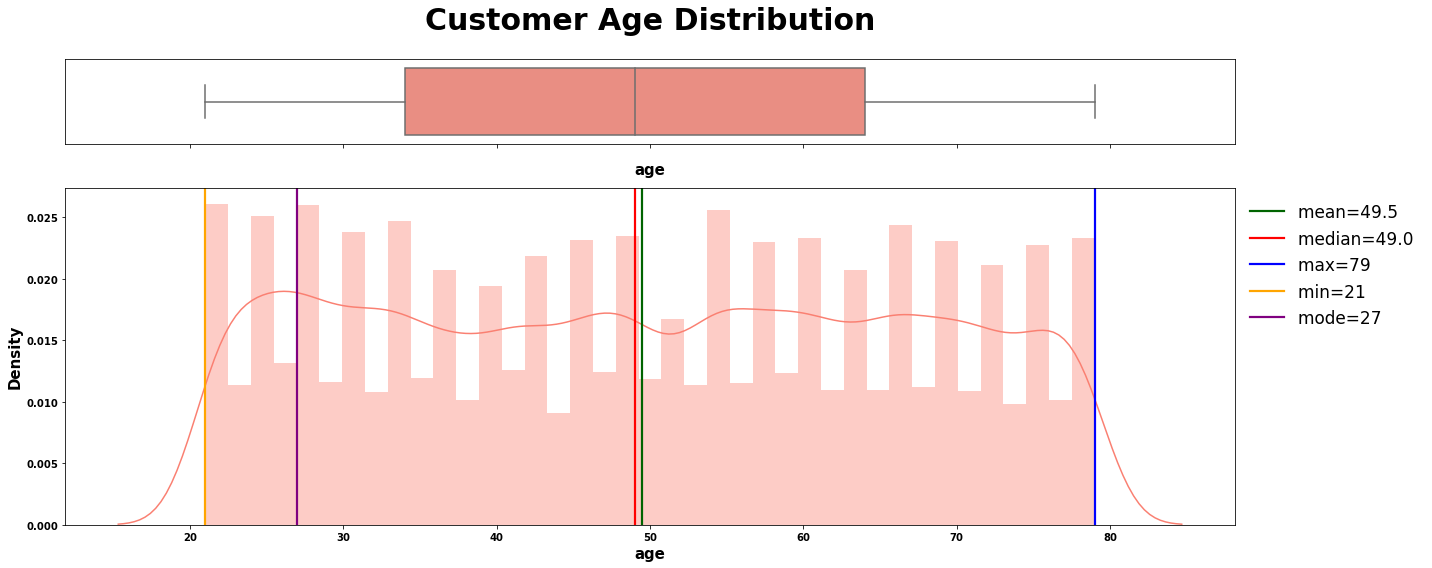

In [45]:
numerical_plotting(data=loan, col="age", 
                   title="Customer Age Distribution", 
                   symb=" ", ylabel="Density", color="salmon");

##### 5.2.1.2 | Notes

In [46]:
chebychev(loan.age, title="Age", 
          interpret=f"at least 75% customer age is lies between 0 and 84")

-------------------- Interpretation of Age --------------------
first calc: 15.1
second calc: 83.9
at least 75% customer age is lies between 0 and 84
----------------------------------------


In [47]:
skew_kurtosis(loan.age, "Skew & Kurtosis Age")

-------------------- Skew & Kurtosis Age --------------------
Skewness: 0.018729105345268404
Approximately symmetric
-----------------------------------
Kurtosis: -1.2217040317291548
The distribution is too flat
-----------------------------------


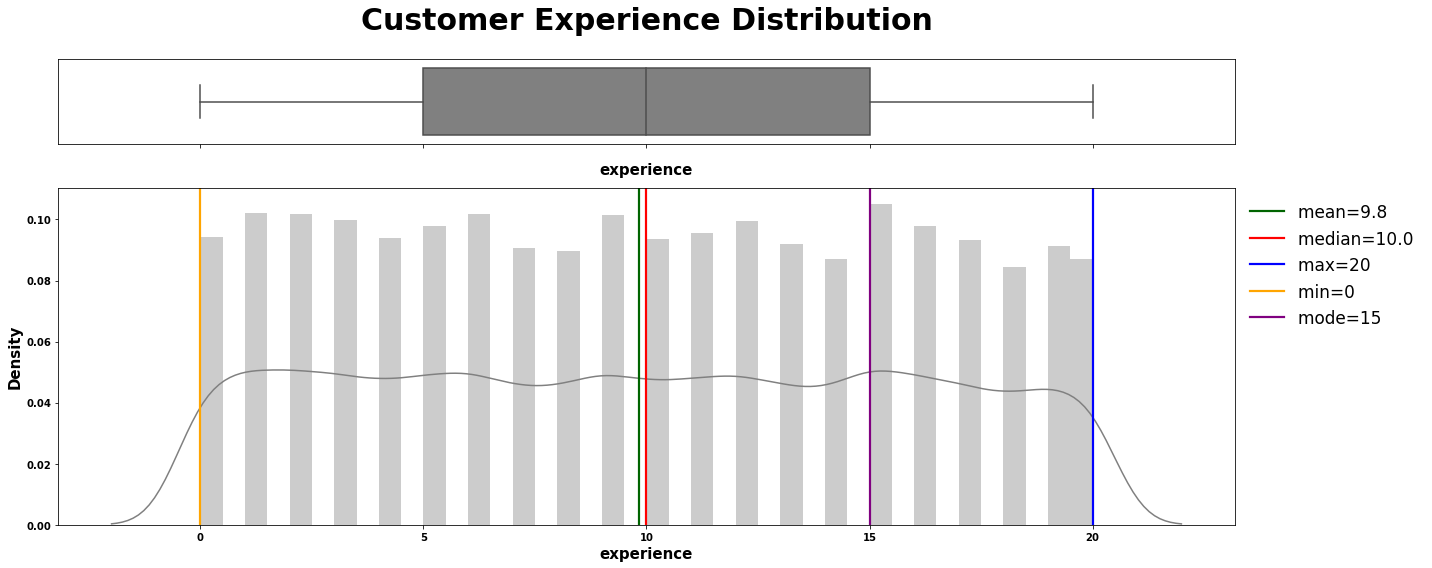

In [48]:
numerical_plotting(data=loan, col="experience", 
                   title="Customer Experience Distribution", 
                   symb=" ", ylabel="Density", color="gray");

##### 5.2.1.3 | Notes:

In [49]:
chebychev(loan.experience, title="Experience", 
          interpret=f"at least 75% customer have 0 to 22 years professional experience of working")

-------------------- Interpretation of Experience --------------------
first calc: -2.2
second calc: 21.8
at least 75% customer have 0 to 22 years professional experience of working
----------------------------------------


In [50]:
skew_kurtosis(loan.experience, "Skew & Kurtosis Experience")

-------------------- Skew & Kurtosis Experience --------------------
Skewness: 0.02545016339798985
Approximately symmetric
-----------------------------------
Kurtosis: -1.2049339021663437
The distribution is too flat
-----------------------------------


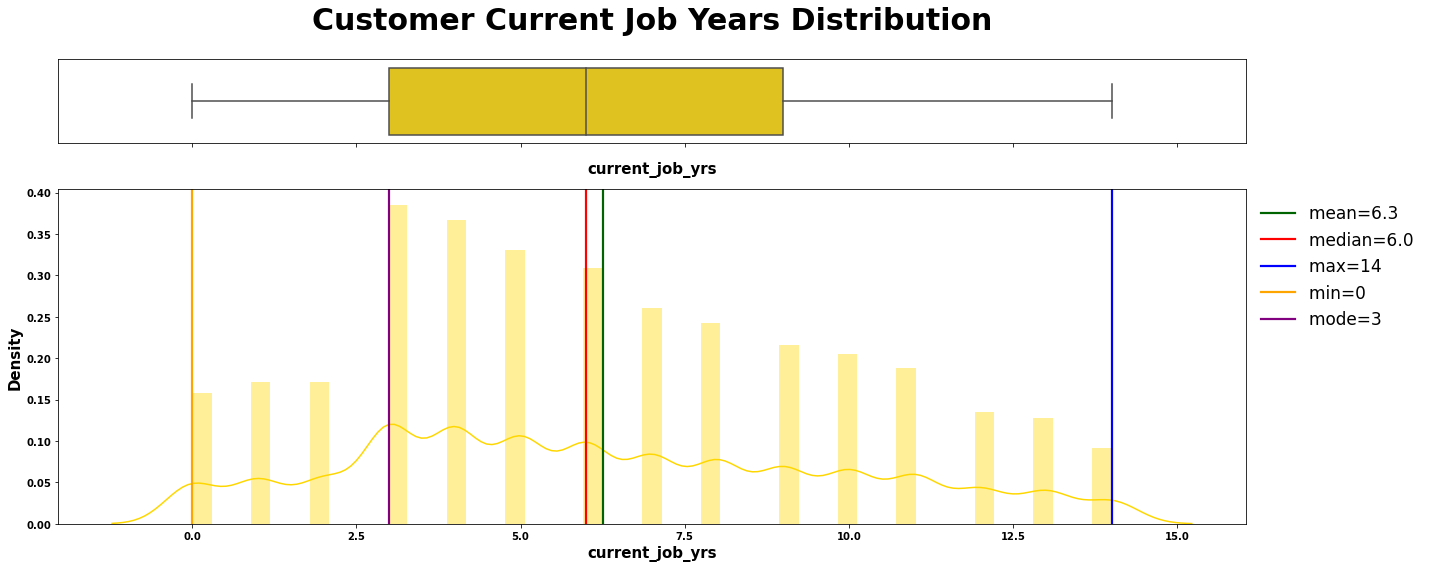

In [51]:
numerical_plotting(data=loan, col="current_job_yrs", 
                   title="Customer Current Job Years Distribution", 
                   symb=" ", ylabel="Density", color="gold");

#### 5.2.1.4 | Notes:

In [52]:
chebychev(loan.current_job_yrs, title="Current Job Years", 
          interpret=f"at least 75% customer have 0 to 13 years of work experience in current job")

-------------------- Interpretation of Current Job Years --------------------
first calc: -1.1
second calc: 13.7
at least 75% customer have 0 to 13 years of work experience in current job
----------------------------------------


In [53]:
skew_kurtosis(loan.current_job_yrs, "Skew & Kurtosis Current Job Years")

-------------------- Skew & Kurtosis Current Job Years --------------------
Skewness: 0.2840335032521698
Approximately symmetric
-----------------------------------
Kurtosis: -0.8100902125256582
The distribution is non-normal
-----------------------------------


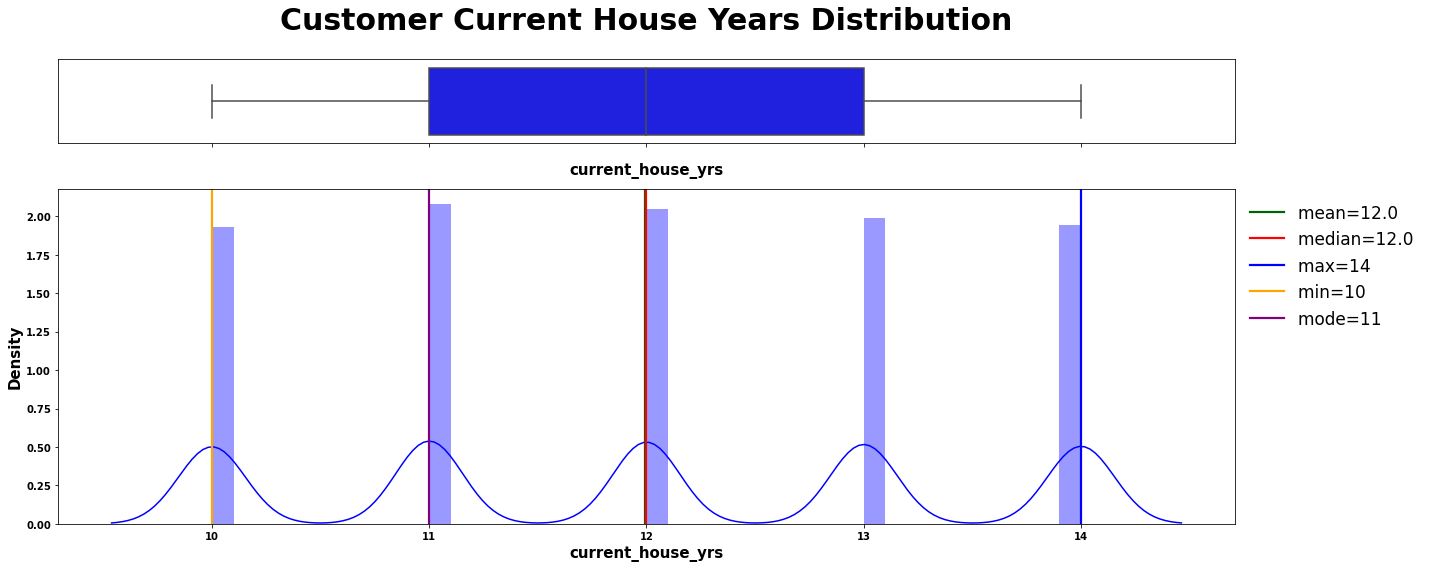

In [54]:
numerical_plotting(data=loan, col="current_house_yrs", 
                   title="Customer Current House Years Distribution", 
                   symb=" ", ylabel="Density", color="blue");

#### 5.2.1.5 | Notes:

In [55]:
chebychev(loan.current_house_yrs, title="Current House Years", 
          interpret=f"at least 75% customer have lived 9 to 15 years in the current residence")

-------------------- Interpretation of Current House Years --------------------
first calc: 9.2
second calc: 14.8
at least 75% customer have lived 9 to 15 years in the current residence
----------------------------------------


In [56]:
skew_kurtosis(loan.current_house_yrs, "Skew & Kurtosis Current House Years")

-------------------- Skew & Kurtosis Current House Years --------------------
Skewness: 0.013589406331354938
Approximately symmetric
-----------------------------------
Kurtosis: -1.2759417106273763
The distribution is too flat
-----------------------------------


#### 5.2.2 | Categorical Column

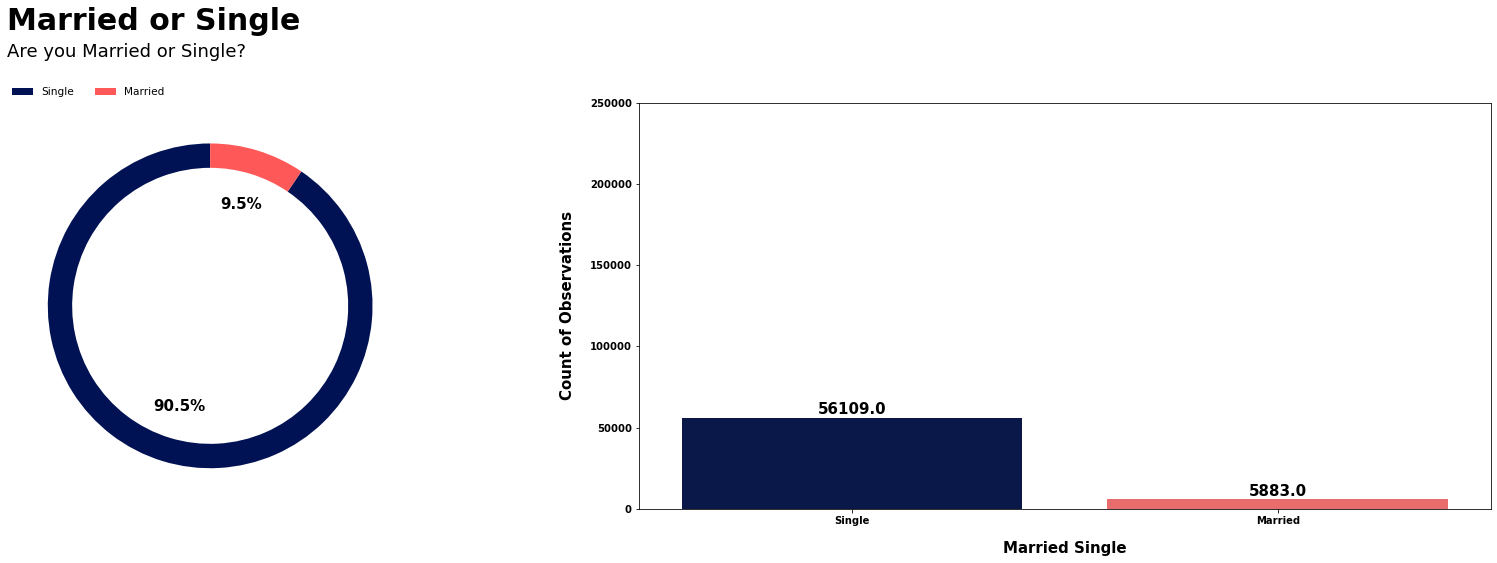

In [57]:
loan_married_single = loan["married_single"].value_counts()

count_pie_plot(datapie=loan_married_single,
               datacount=loan,
               colcount="married_single",
               colpiey=loan_married_single.values,
               text1="Married or Single",
               pielabels=["Single", "Married"],
               text2="Are you Married or Single?",
               piecomap=["#001253", "#FF5858"],
               countcomap=["#001253", "#FF5858"],
               xlabel="Married Single",
               piefs=15,
               yplus=5000,
               ylabel="Count of Observations",
               xticklabel=["Single", "Married"],
               yticklabel=list(np.arange(0, 260000, 50000)),
               ystart=0,
               yend=250000);

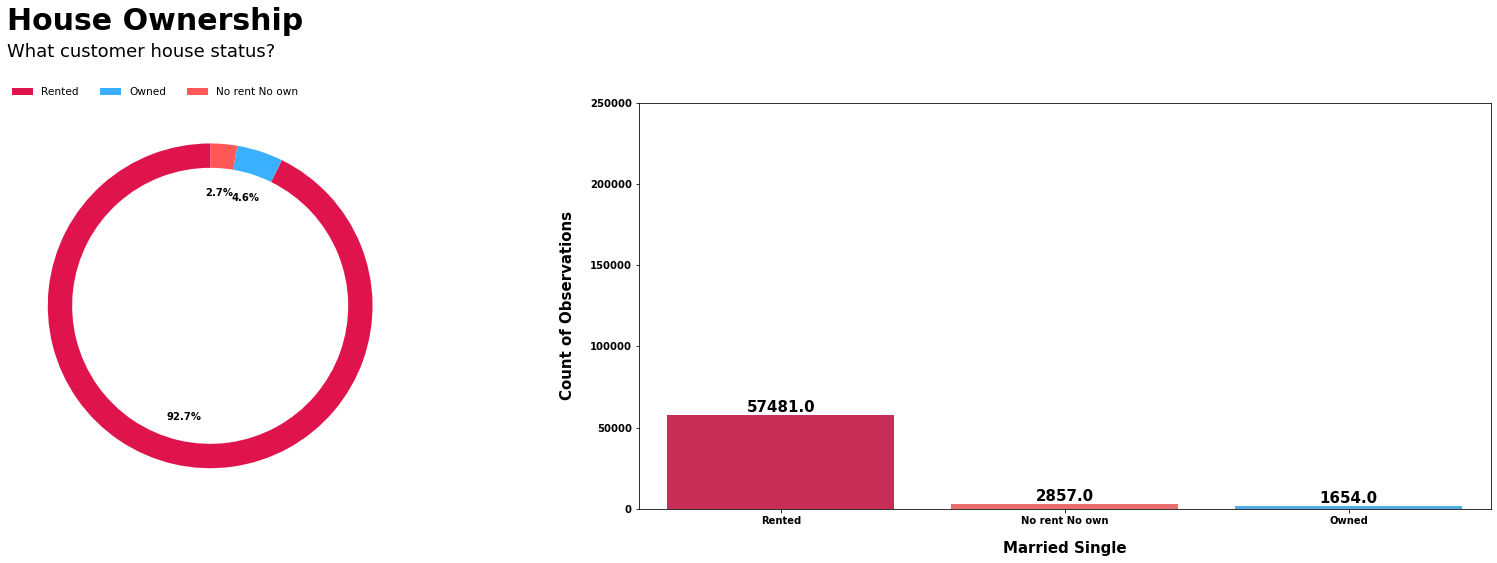

In [58]:
loan_house_ownership = loan["house_ownership"].value_counts()

count_pie_plot(datapie=loan_house_ownership,
               datacount=loan,
               colcount="house_ownership",
               colpiey=loan_house_ownership.values,
               text1="House Ownership",
               pielabels=["Rented", "Owned", "No rent No own"],
               text2="What customer house status?",
               piecomap=["#E0144C", "#3AB0FF", "#FF5858"],
               countcomap=["#E0144C", "#FF5858", "#3AB0FF"],
               xlabel="Married Single",
               piefs=10,
               yplus=5000,
               pctdistance=0.7,
               ylabel="Count of Observations",
               xticklabel=["Rented", "No rent No own", "Owned"],
               yticklabel=list(np.arange(0, 260000, 50000)),
               ystart=0,
               yend=250000);

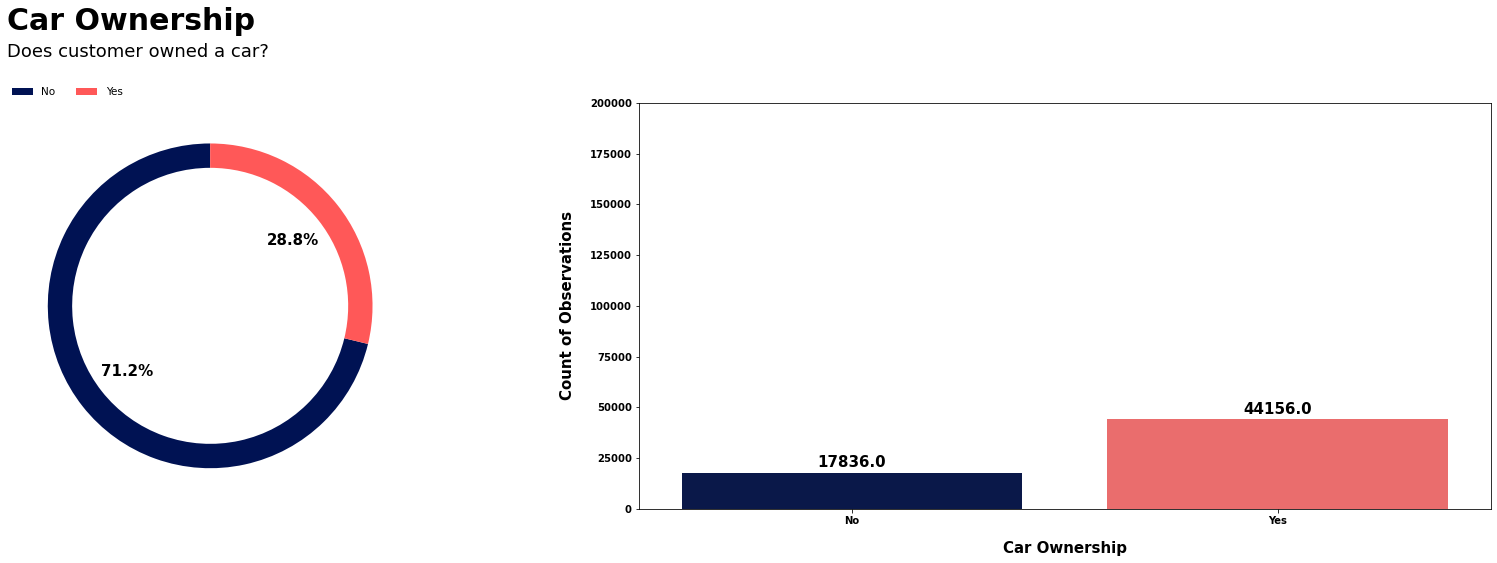

In [59]:
loan_car_ownership = loan["car_ownership"].value_counts()

count_pie_plot(datapie=loan_car_ownership,
               datacount=loan,
               colcount="car_ownership",
               colpiey=loan_car_ownership.values,
               text1="Car Ownership",
               pielabels=["No", "Yes"],
               text2="Does customer owned a car?",
               piecomap=["#001253", "#FF5858"],
               countcomap=["#001253", "#FF5858"],
               xlabel="Car Ownership",
               piefs=15,
               yplus=5000,
               ylabel="Count of Observations",
               xticklabel=["No", "Yes"],
               yticklabel=list(np.arange(0, 225000, 25000)),
               ystart=0,
               yend=200000);

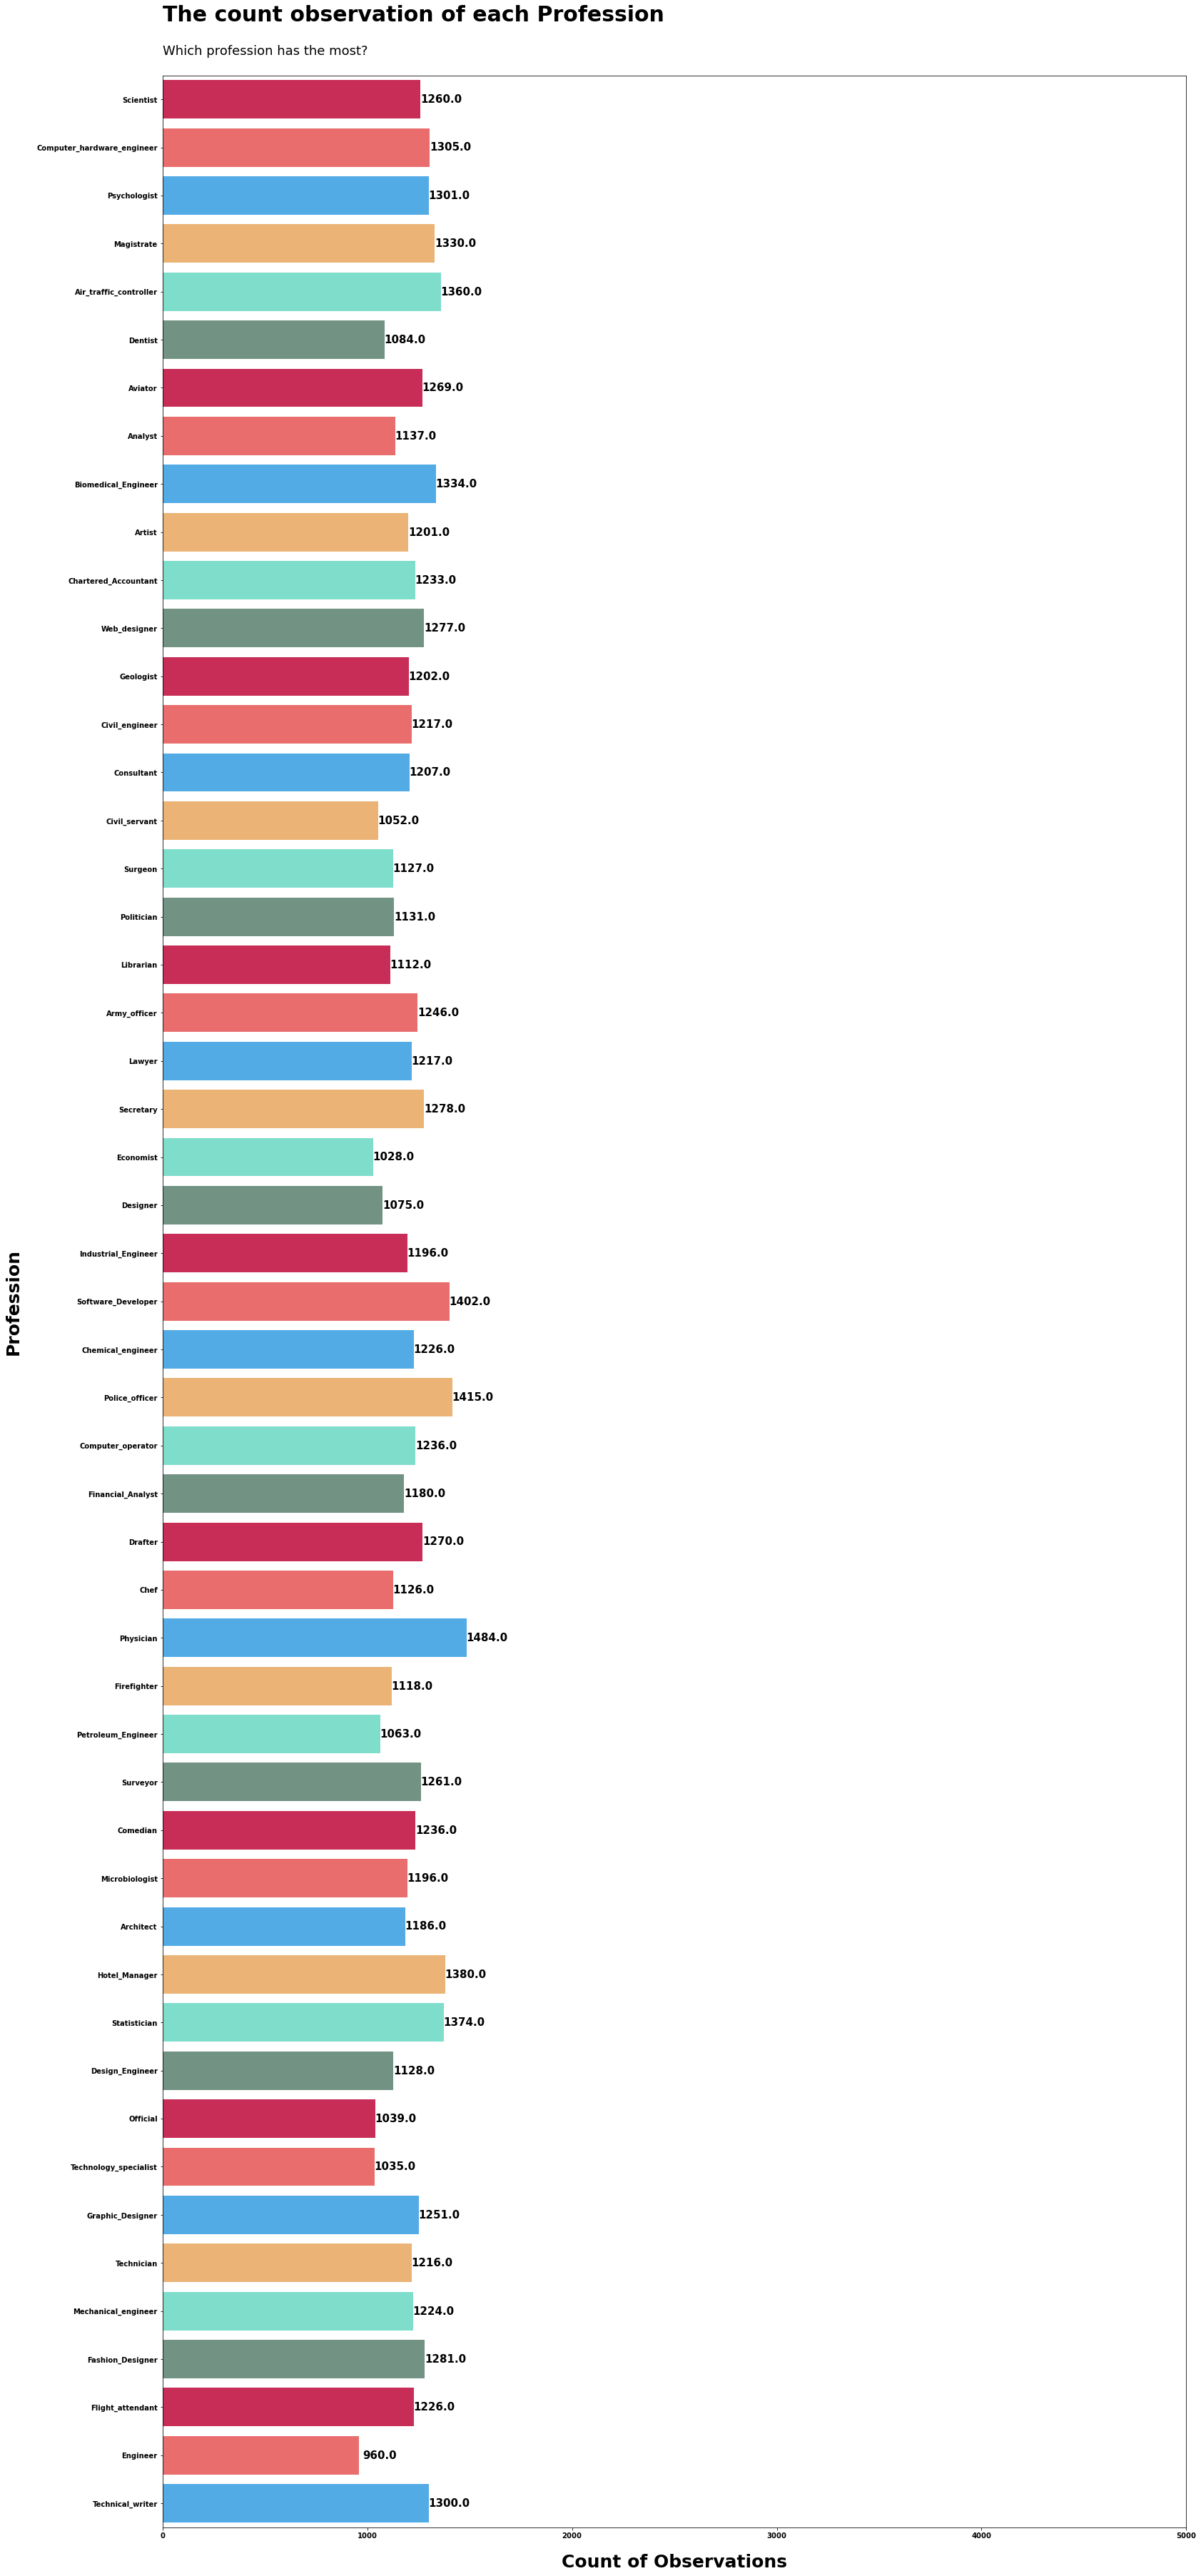

In [60]:
data = loan
coly = "profession"
sizey = 50
text1 = "The count observation of each Profession"
text2 = "Which profession has the most?"
xlabel = "Count of Observations"
ylabel = "Profession"
xstart, xend = 0, 5000
xplus = 100
ytimes1, ytimes2 = 3.5, 2

countplot_y(data=data, coly=coly, sizey=sizey, xplus=xplus,
            text1=text1, text2=text2, xlabel=xlabel, ytimes1=ytimes1, 
            ytimes2=ytimes2, ylabel=ylabel, xstart=xstart, xend=xend);

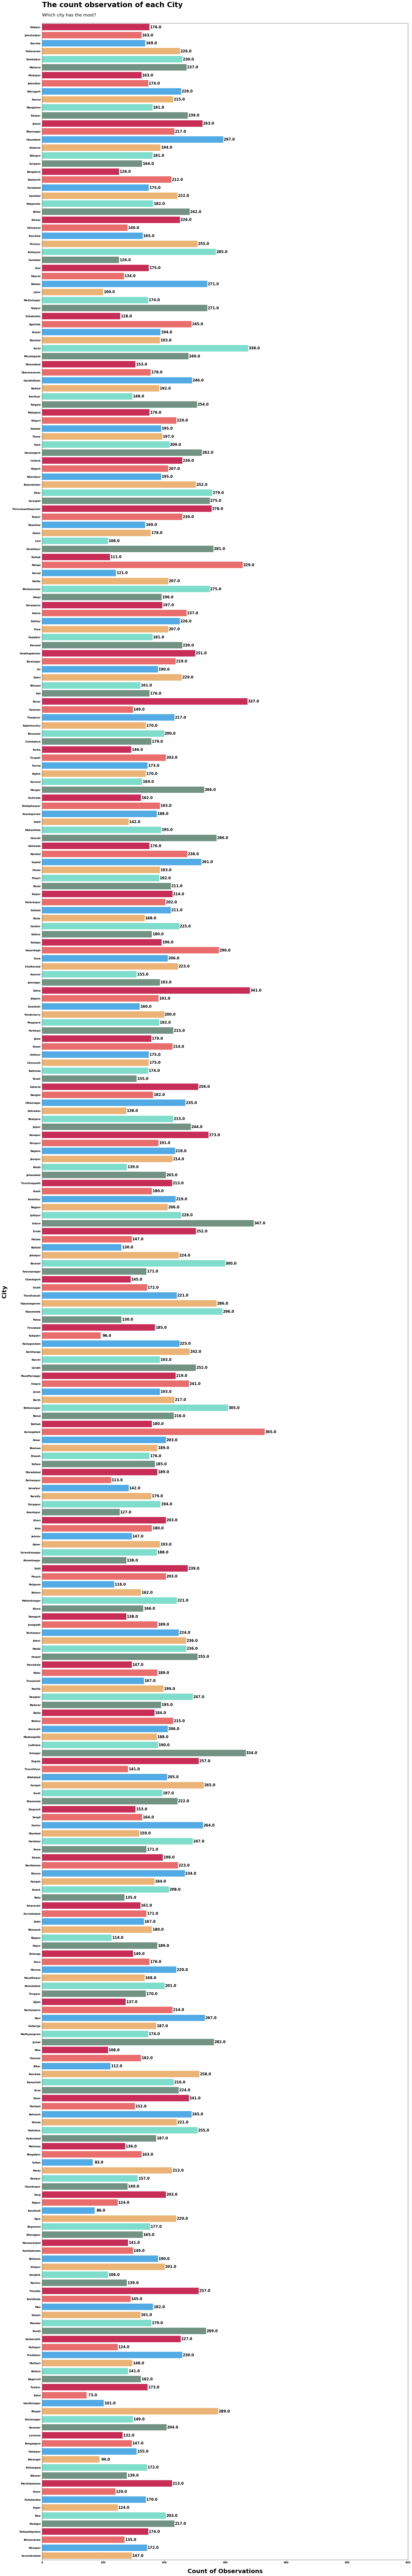

In [61]:
data = loan
coly = "city"
sizey = 150
text1 = "The count observation of each City"
text2 = "Which city has the most?"
xlabel = "Count of Observations"
ylabel = "City"
xstart, xend = 0, 600
xplus = 10
ytimes1, ytimes2 = 5.5, 3

countplot_y(data=data, coly=coly, sizey=sizey, xplus=xplus,
            text1=text1, text2=text2, xlabel=xlabel, ytimes1=ytimes1,
            ytimes2=ytimes2, ylabel=ylabel, xstart=xstart, xend=xend);

### 5.3 | Bivariate Analysis

#### 5.3.1 | What is Correlation?

Correlation is a statistical measure (expressed as a number) 
that describes the size and direction of a relationship between two or more variables. 
A correlation between variables, however, does not automatically mean that the change in one variable is the
cause of the change in the values of the other variable.


Variables within a dataset can be related for lots of reasons.

For example:

One variable could cause or depend on the values of another variable.
One variable could be lightly associated with another variable.
Two variables could depend on a third unknown variable.
It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

Positive Correlation: both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.
Negative Correlation: variables change in opposite directions.
The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. An example is linear regression, where one of the offending correlated variables should be removed in order to improve the skill of the model.

We may also be interested in the correlation between input variables with the output variable in order provide insight into which variables may or may not be relevant as input for developing a model.

The structure of the relationship may be known, e.g. it may be linear, or we may have no idea whether a relationship exists between two variables or what structure it may take. Depending what is known about the relationship and the distribution of the variables, different correlation scores can be calculated.

Pearson’s Correlation

r=∑(xi−x¯)(yi−y¯)∑(xi−x¯)2∑(yi−y¯)2−−−−−−−−−−−−−−−−−−√
 
The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between  −1  and  1  that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of  0  means no correlation. The value must be interpreted, where often a value below  −0.5  or above  0.5  indicates a notable correlation, and values below those values suggests a less notable correlation.

The pearsonr() SciPy function can be used to calculate the Pearson’s correlation coefficient between two data samples with the same length.

#### 5.3.1 | Nonparametric Rank Correlation

Correlation refers to the association between the observed values of two variables.

The variables may have a positive association, meaning that as the values for one variable increase, so do the values of the other variable. The association may also be negative, meaning that as the values of one variable increase, the values of the others decrease. Finally, the association may be neutral, meaning that the variables are not associated.

Correlation quantifies this association, often as a measure between the values  −1  to  1  for perfectly negatively correlated and perfectly positively correlated. The calculated correlation is referred to as the “correlation coefficient.” This correlation coefficient can then be interpreted to describe the measures.

See the table below to help with interpretation the correlation coefficient.

Table

Correlation Coefficient for a Direct Relationship	Correlation Coefficient for an inderect Relationship	Relationship Strength of the Variables
0.0 	 0.0 	None/trivial
0.1 	 −0.1 	Weak/small
0.3 	 −0.3 	Moderate/medium
0.5 	 −0.5 	Strong/large
1.0 	 −1.0 	Perfect
The correlation between two variables that each have a Gaussian distribution can be calculated using standard methods such as the Pearson’s correlation. This procedure cannot be used for data that does not have a Gaussian distribution. Instead, rank correlation methods must be used.

Rank correlation refers to methods that quantify the association between variables using the ordinal relationship between the values rather than the specific values. Ordinal data is data that has label values and has an order or rank relationship; for example: ‘low‘, ‘medium‘, and ‘high‘.

Rank correlation can be calculated for real-valued variables. This is done by first converting the values for each variable into rank data. This is where the values are ordered and assigned an integer rank value. Rank correlation coefficients can then be calculated in order to quantify the association between the two ranked variables.

Because no distribution for the values is assumed, rank correlation methods are referred to as distribution-free correlation or nonparametric correlation. Interestingly, rank correlation measures are often used as the basis for other statistical hypothesis tests, such as determining whether two samples were likely drawn from the same (or different) population distributions.

Rank correlation methods are often named after the researcher or researchers that developed the method. Four examples of rank correlation methods are as follows:

Spearman’s Rank Correlation.
Kendall’s Rank Correlation.
Goodman and Kruskal’s Rank Correlation.
Somers’ Rank Correlation.
In the following sections, we will take a closer look at two of the more common rank correlation methods: Spearman’s

Spearman’s Rank Correlation

p=1−6∑d2in(n2−1)
 
Spearman’s rank correlation is named for Charles Spearman.

It may also be called Spearman’s correlation coefficient and is denoted by the lowercase greek letter rho (p). As such, it may be referred to as Spearman’s rho.

This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship. As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).

The Spearman rank-order correlation is a statistical procedure that is designed to measure the relationship between two variables on an ordinal scale of measurement.

— Page 124, Nonparametric Statistics for Non-Statisticians: A Step-by-Step Approach, 2009.

The intuition for the Spearman’s rank correlation is that it calculates a Pearson’s correlation (e.g. a parametric measure of correlation) using the rank values instead of the real values. Where the Pearson’s correlation is the calculation of the covariance (or expected difference of observations from the mean) between the two variables normalized by the variance or spread of both variables.

Spearman’s rank correlation can be calculated in Python using the spearmanr() SciPy function.

### 5.3.1 | Numerical Column

In [62]:
pearson_correlation(loan["income"], loan["risk_flag"], "Income & Risk Flag Correlation")

--------------- Income & Risk Flag Correlation ---------------

Pearson correlation coefficient: -0.007

Samples are uncorrelated (fail to reject H0) p=0.064



In [63]:
pearson_correlation(loan["age"], loan["risk_flag"], "Age & Risk Flag Correlation")

--------------- Age & Risk Flag Correlation ---------------

Pearson correlation coefficient: -0.031

Samples are correlated (reject H0) p=0.000



In [64]:
pearson_correlation(loan["experience"], loan["risk_flag"], "Experience & Risk Flag Correlation")

--------------- Experience & Risk Flag Correlation ---------------

Pearson correlation coefficient: -0.050

Samples are correlated (reject H0) p=0.000



In [65]:
pearson_correlation(loan["current_job_yrs"], loan["risk_flag"], "Current Job Years & Risk Flag Correlation")

--------------- Current Job Years & Risk Flag Correlation ---------------

Pearson correlation coefficient: -0.025

Samples are correlated (reject H0) p=0.000



In [66]:
pearson_correlation(loan["current_house_yrs"], loan["risk_flag"], "Current Job Years & Risk Flag Correlation")

--------------- Current Job Years & Risk Flag Correlation ---------------

Pearson correlation coefficient: -0.009

Samples are correlated (reject H0) p=0.028



#### 5.3.2 | Categorical Column

In [67]:
spearman_correlation(data1=loan["car_ownership"], data2=loan["risk_flag"], title="Car Ownership & Risk Flag Correlation")

--------------- Car Ownership & Risk Flag Correlation ---------------

Spearmans correlation coefficient: -0.034

Samples are correlated (reject H0) p=0.000



In [68]:
spearman_correlation(data1=loan["profession"], data2=loan["risk_flag"], title="Profession & Risk Flag Correlation")

--------------- Profession & Risk Flag Correlation ---------------

Spearmans correlation coefficient: -0.006

Samples are uncorrelated (fail to reject H0) p=0.124



In [69]:
spearman_correlation(data1=loan["city"], data2=loan["risk_flag"], title="City & Risk Flag Correlation")

--------------- City & Risk Flag Correlation ---------------

Spearmans correlation coefficient: 0.009

Samples are correlated (reject H0) p=0.024



In [70]:
spearman_correlation(data1=loan["state"], data2=loan["risk_flag"], title="State & Risk Flag Correlation")

--------------- State & Risk Flag Correlation ---------------

Spearmans correlation coefficient: -0.009

Samples are correlated (reject H0) p=0.029



### 5.4 | Multivariate Analysis

##### 5.4.1 | Categorical Column

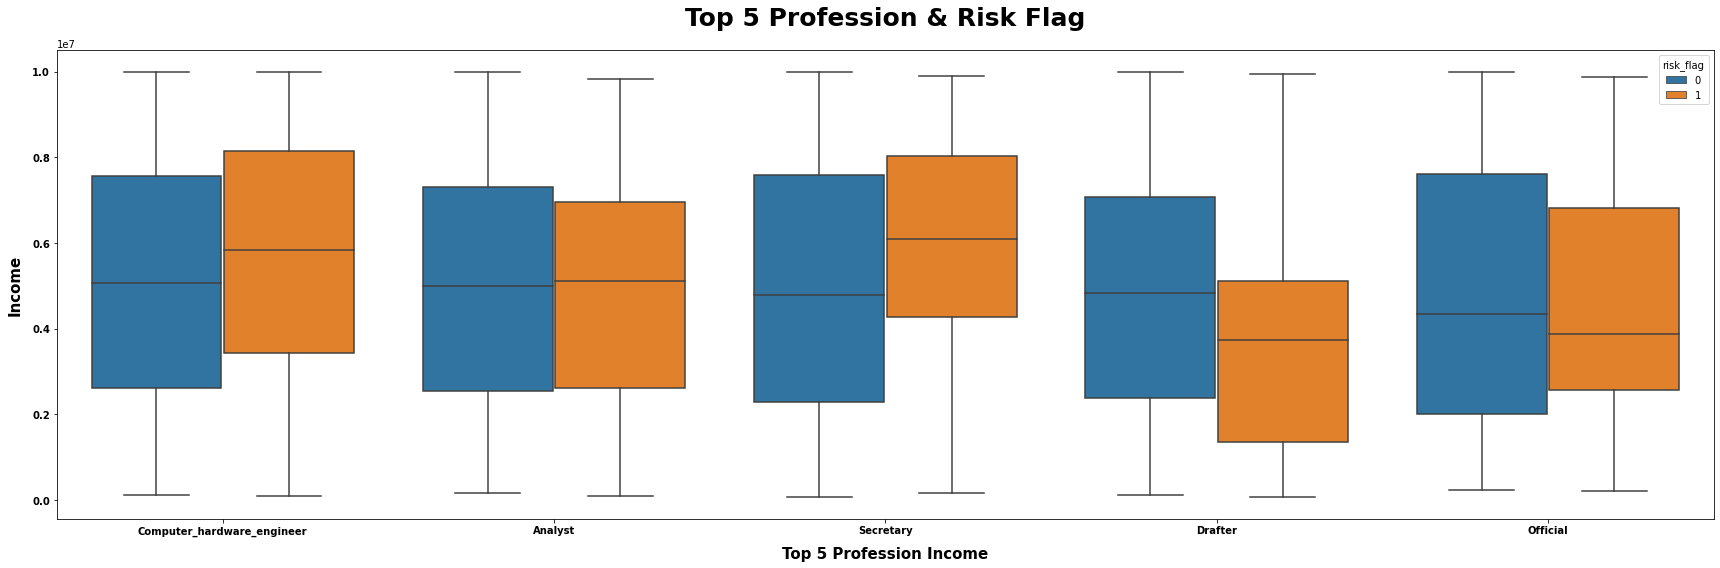

In [71]:
I = (loan.loc[loan["profession"]
         .isin(["Drafter", "Secretary", "Computer_hardware_engineer", "Analyst", "Official"])]
         .loc[:, ["income", "profession", "risk_flag"]])

data = I
title = "Top 5 Profession & Risk Flag"
x = "profession"
y = "income"
hue = "risk_flag"
xlabel = "Top 5 Profession Income"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

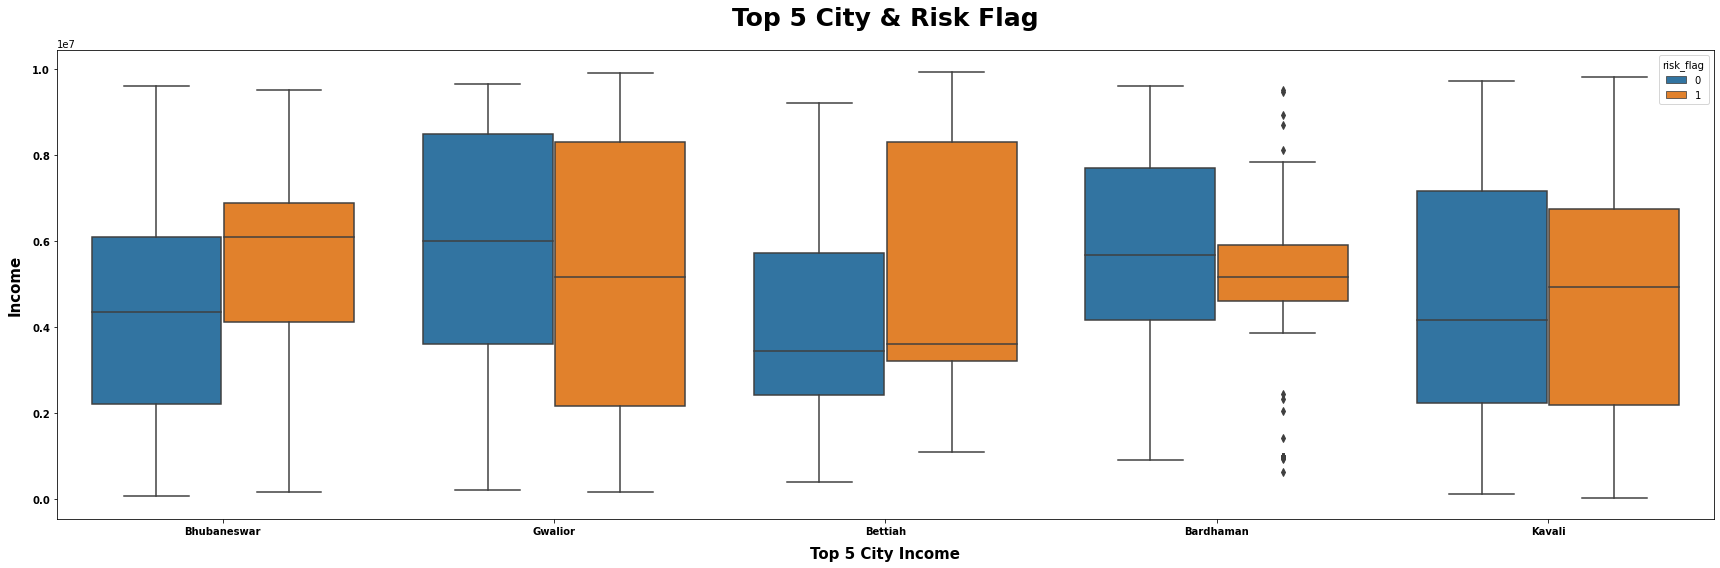

In [72]:
C = (loan.loc[loan["city"]
         .isin(["Bhubaneswar", "Bettiah", "Gwalior", "Kavali","Bardhaman"])]
         .loc[:, ["income", "city", "risk_flag"]])

data = C
title = "Top 5 City & Risk Flag"
x = "city"
y = "income"
hue = "risk_flag"
xlabel = "Top 5 City Income"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

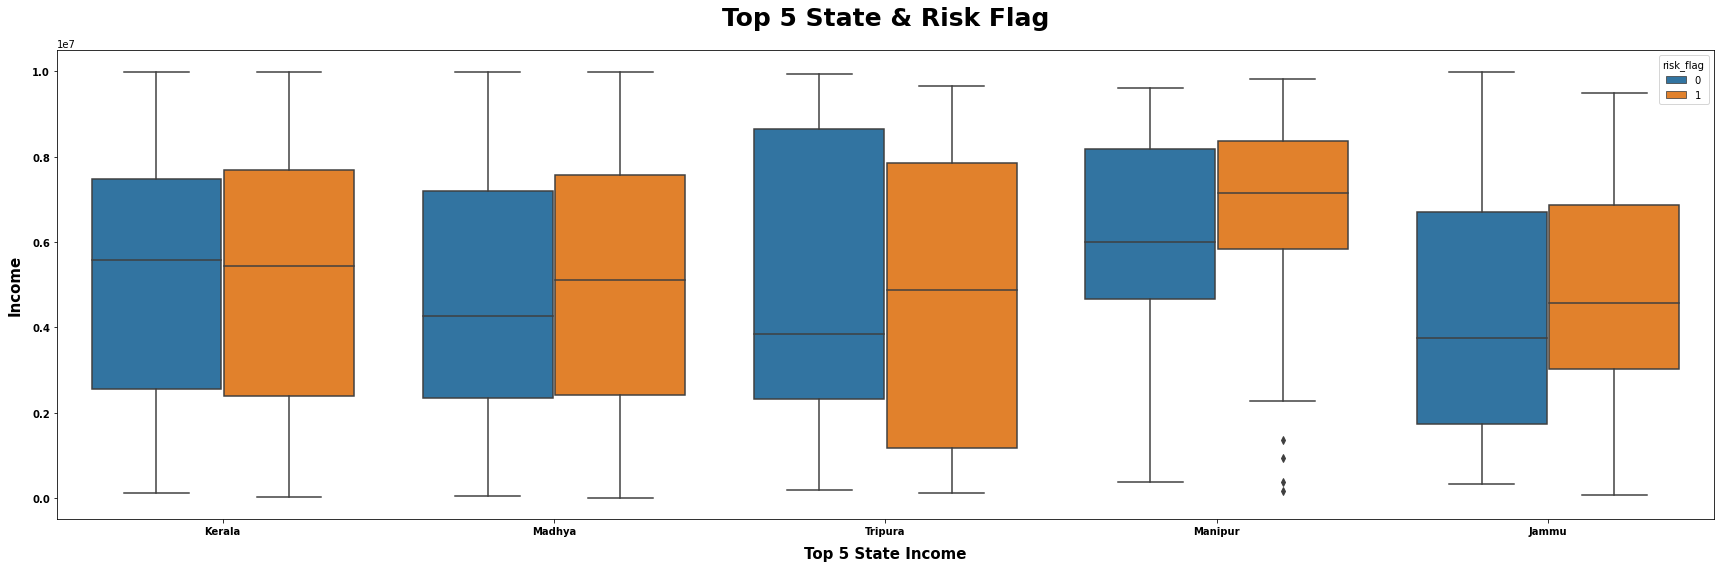

In [73]:
S = (loan.loc[loan["state"]
         .isin(["Manipur", "Kerala", "Tripura", "Madhya", "Jammu"])]
         .loc[:, ["income", "state", "risk_flag"]])

data = S
title = "Top 5 State & Risk Flag"
x = "state"
y = "income"
hue = "risk_flag"
xlabel = "Top 5 State Income"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

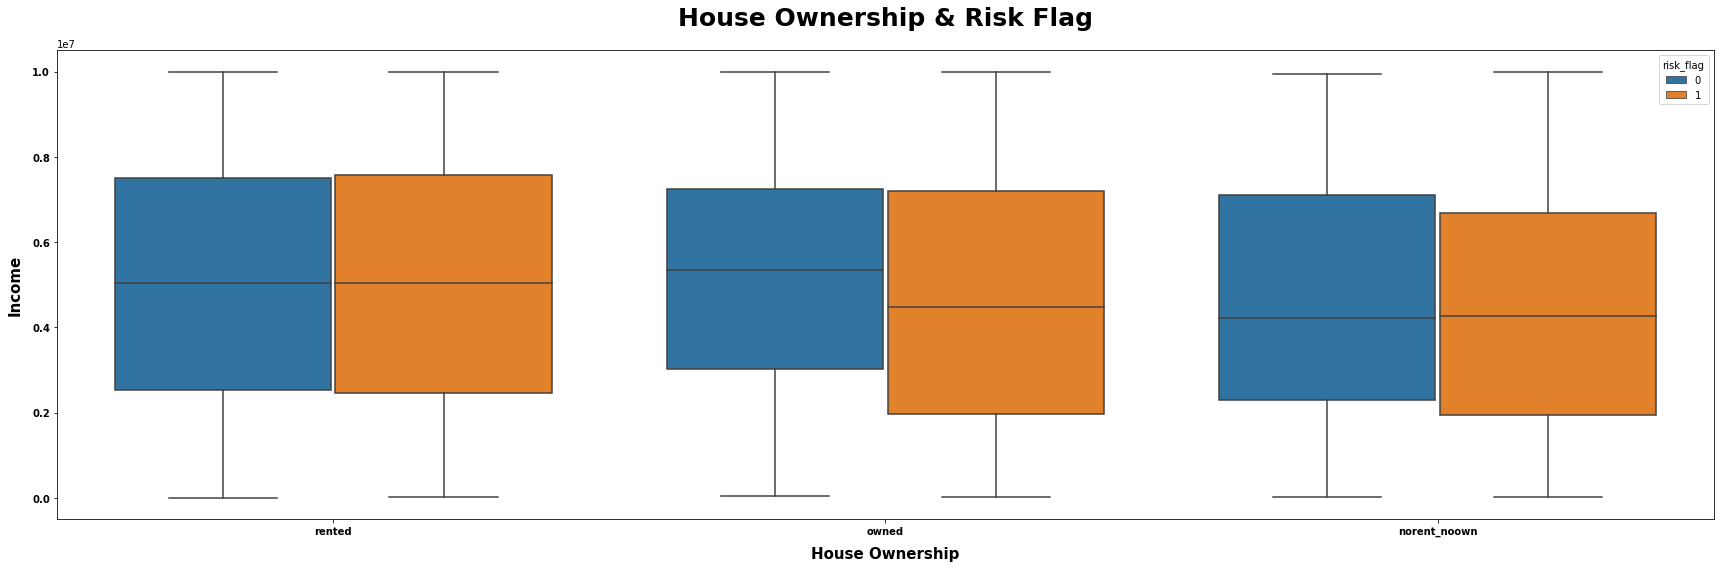

In [74]:
H = (loan.loc[loan["house_ownership"]
         .isin(["rented", "owned", "norent_noown"])]
         .loc[:, ["income", "house_ownership", "risk_flag"]])

data = H
title = "House Ownership & Risk Flag"
x = "house_ownership"
y = "income"
hue = "risk_flag"
xlabel = "House Ownership"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

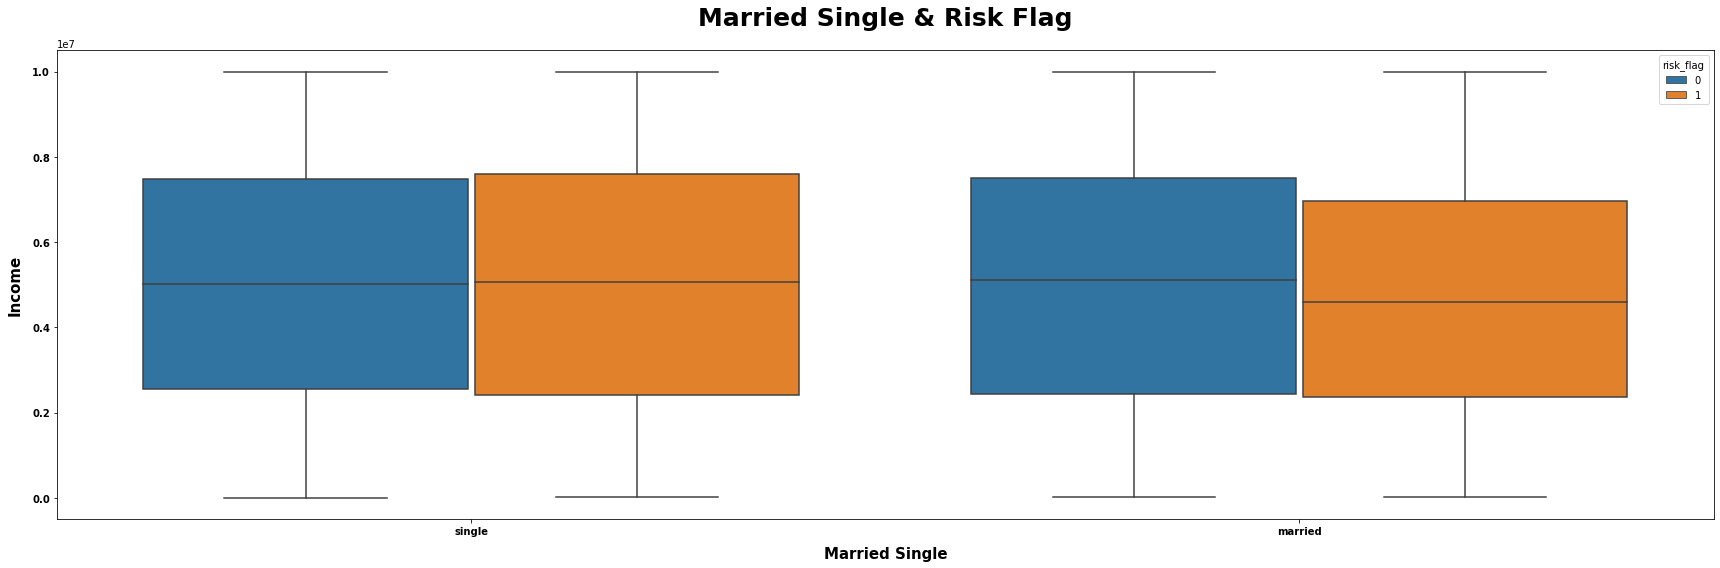

In [75]:
M = (loan.loc[loan["married_single"]
         .isin(["single", "married"])]
         .loc[:, ["income", "married_single", "risk_flag"]])

data = M
title = "Married Single & Risk Flag"
x = "married_single"
y = "income"
hue = "risk_flag"
xlabel = "Married Single"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

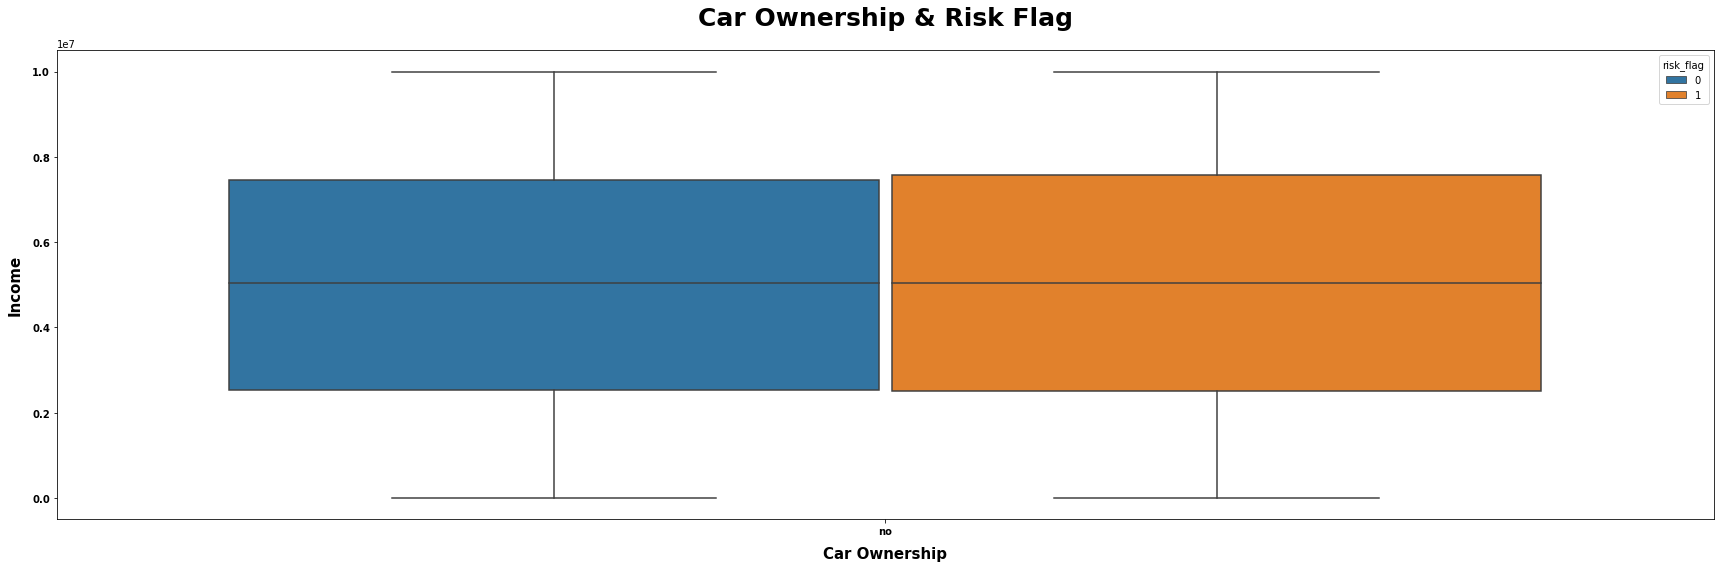

In [76]:
CO = (loan.loc[loan["car_ownership"]
          .isin(["no", "single"])]
          .loc[:, ["income", "car_ownership", "risk_flag"]])

data = CO
title = "Car Ownership & Risk Flag"
x = "car_ownership"
y = "income"
hue = "risk_flag"
xlabel = "Car Ownership"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

### 5.4.2 | Numerical Column

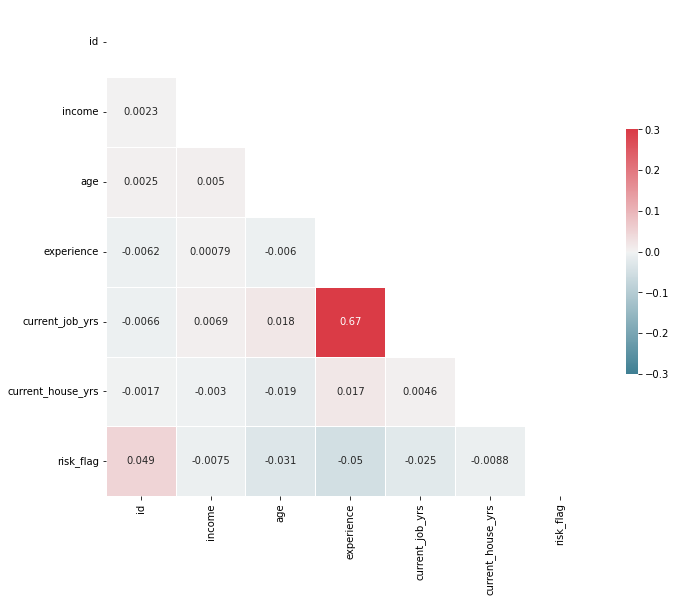

In [77]:
# Create the correlation matrix
corr = loan.corr()

# Generate mask for the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ration
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            annot=True,
            vmax=.3,
            vmin=-.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5});

In [78]:
corr.style.background_gradient(cmap=cmap)

,id,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
id,1.000000,0.002323,0.002514,-0.006217,-0.006641,-0.001725,0.049066
income,0.002323,1.000000,0.005022,0.000790,0.006921,-0.002995,-0.007451
age,0.002514,0.005022,1.000000,-0.006016,0.018458,-0.018628,-0.030857
experience,-0.006217,0.000790,-0.006016,1.000000,0.668971,0.016831,-0.050305
current_job_yrs,-0.006641,0.006921,0.018458,0.668971,1.000000,0.004631,-0.025066
current_house_yrs,-0.001725,-0.002995,-0.018628,0.016831,0.004631,1.000000,-0.008817
risk_flag,0.049066,-0.007451,-0.030857,-0.050305,-0.025066,-0.008817,1.000000


## 6 | Data Preprocessing

### 6.1 | Getting Mutual Info

In [79]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# define column has type Object to implement LabelEncoder
list_object = loan.select_dtypes("object").columns.tolist()
encoder = LabelEncoder()

for col in list_object:
    loan[col] = encoder.fit_transform(loan[col].values.tolist())

In [80]:
# getting the Mutual Information about the data
X_mutual = loan.astype("int64").reset_index().copy()
y_mutual = X_mutual.pop("risk_flag")

del X_mutual["id"]

# all discrete features should now have integer dtypes
discrete_features = X_mutual.dtypes == int

# mi scores function
def make_mi_scores(X_mutual, y_mutual, discrete_features):
    mi_scores = mutual_info_classif(X_mutual, y_mutual, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mutual.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_mutual, y_mutual, discrete_features)
mi_scores.to_frame()

,MI Scores
index,0.693
income,0.570
city,0.025
experience,0.004
age,0.004
state,0.004
profession,0.003
current_job_yrs,0.003
house_ownership,0.001
car_ownership,0.001


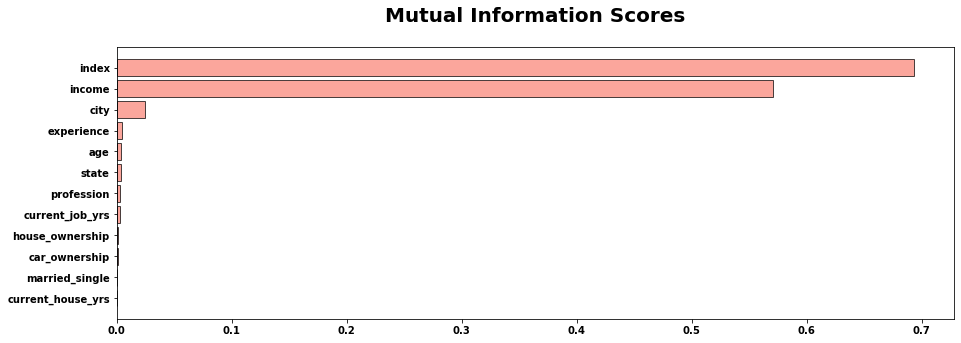

In [81]:
# variables
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
# plotting
plt.figure(figsize=(15, 5))
plt.barh(width, scores, color="salmon", alpha=0.7, edgecolor="k")
plt.yticks(width, ticks, weight="bold", )
plt.xticks(weight="bold")
plt.title("Mutual Information Scores",
          weight="bold",
          fontsize=20,
          pad=25);

### 6.2 | Feature Selection

In [82]:
# For now, let's just use income - current_job_yrs column
# I'll update and maybe use feature engineering in the future
features = ["income", "city", "experience", "age", 
            "state", "profession", "current_job_yrs"]

X_features = loan[features]
y_labels = loan["risk_flag"]

X_features.shape, y_labels.shape

((61992, 7), (61992,))

In [83]:
X_features.head()

,income,city,experience,age,state,profession,current_job_yrs
96859,8514369,301,5,21,20,41,4
148175,5682236,134,14,32,10,13,6
91954,7541730,18,2,23,25,40,2
110318,1923313,221,5,71,22,32,3
50524,1067890,257,14,41,17,0,3
